#### 读取Jason文件

In [ ]:
import json
from collections import defaultdict

import matplotlib.pyplot as plt
import seaborn as sns
def load_json_logs(json_logs):
    # load and convert json_logs to log_dict, key is epoch, value is a sub dict
    # keys of sub dict is different metrics
    # value of sub dict is a list of corresponding values of all iterations
    log_dicts = [dict() for _ in json_logs]
    for json_log, log_dict in zip(json_logs, log_dicts):
        with open(json_log, 'r') as log_file:
            for line in log_file:
                log = json.loads(line.strip())
                # skip lines without `epoch` field
                if 'epoch' not in log:
                    continue
                epoch = log.pop('epoch')
                if epoch not in log_dict:
                    log_dict[epoch] = defaultdict(list)
                for k, v in log.items():
                    log_dict[epoch][k].append(v)
    return log_dicts

json_path = r'D:\software\Code\code-file\mmseg\log\20220623_174557.log.json'
load_json_logs(json_path)


['deeplab-50', 'deeplav-101', 'pspnet', 'segformer', 'segmenter', 'setrpup']
3200


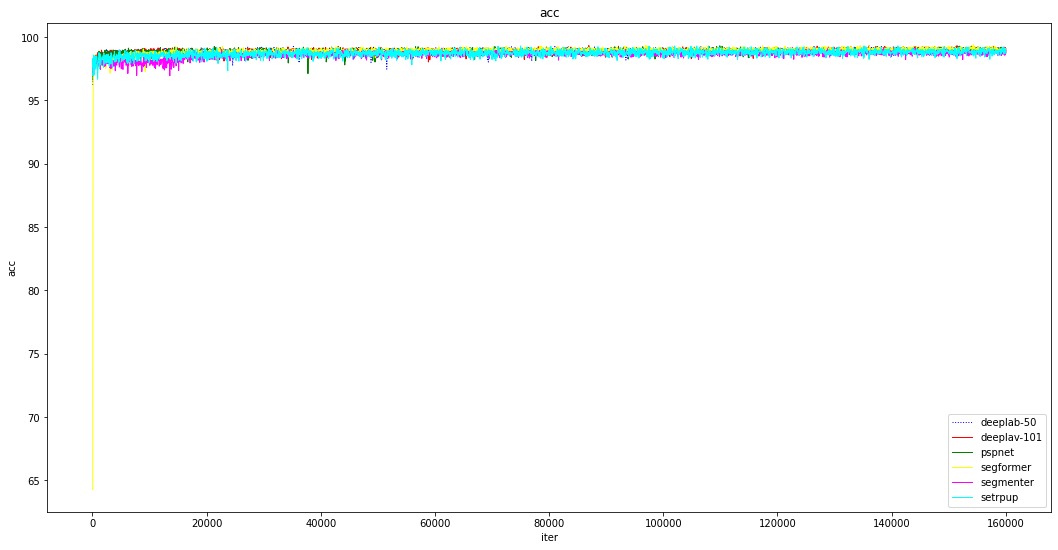

In [34]:
import json
import os
import matplotlib.pyplot as plt

json_path = r'D:\software\Code\code-file\T\log'

loss_p = 'decode.acc_seg'


log_dicts = [dict() for _ in os.listdir(json_path)]
log_name = []
for json_log,log_dict in zip(os.listdir(json_path),log_dicts):
    log_name.append(json_log.split('.')[0])
    loss=[]
    iter = []
    with open(os.path.join(json_path,json_log), 'r') as log_file:
        for line in log_file:
            log = json.loads(line.strip())
            if 'epoch' not in log:
                continue
            for k,v in log.items():
                if k == 'iter' and ('time' in log) and ('iter' in log) and ('loss' in log):
                    iter.append(v)
                if k == loss_p and ('time' in log) and ('loss' in log) and ('iter' in log):
                    loss.append(v)
    log_dict['iter']=iter
    log_dict[loss_p]=loss

print(log_name)


x = log_dicts[0]['iter']
loss1 = log_dicts[0][loss_p]
loss2 = log_dicts[1][loss_p]
loss3 = log_dicts[2][loss_p]
loss4 = log_dicts[3][loss_p]
loss5 = log_dicts[4][loss_p]
loss6 = log_dicts[5][loss_p]
x2 = log_dicts[5]['iter']


print(len(loss5))
fig, ax = plt.subplots(figsize=(18,9))
ax.plot(x, loss1, c='blue', linestyle=':',linewidth=1, label=log_name[0])
ax.plot(x, loss2, c='red', linestyle='-', linewidth=1,label=log_name[1])
ax.plot(x, loss3, c='green', linestyle='-', linewidth=1,label=log_name[2])
ax.plot(x, loss4, c='yellow', linestyle='-',linewidth=1, label=log_name[3])
ax.plot(x, loss5, c='magenta', linestyle='-',linewidth=1, label=log_name[4])
ax.plot(x2, loss6, c='cyan', linestyle='-',linewidth=1, label=log_name[5])


# #设置图例并且设置图例的字体及大小
ax.set(ylabel='acc', xlabel='iter', title='acc')

ax.legend()
plt.savefig(r'D:\software\Code\code-file\T\acc.jpg',dpi = 200, bbox_inches = 'tight')
plt.show()


In [9]:
import re
pattern = re.compile('loss: (\s+)')

print (pattern.findall('epoch: 40 [15295/15299 (100%)], loss: 0.014454'))

[]


#### 读取log文件

In [ ]:
import json,os,re
import matplotlib.pyplot as plt


## 读取两个指标并画图
json_path = r'D:\31890\Desktop\codefile\Utils\Packages\Read_log__\log\unet_o.log'
with open(json_path, 'r',encoding='utf-8') as log_file:
    mean_l=[]
    list =[]
    [list.append([]) for i in range(100)]
    # print(mean_l)
    # print(list)
    for line in log_file:
        if '---Trian---' in line:
            match1 = re.search(r'epoch: (\d+)', line)
            match2 = re.search(r'loss: (\d+(\.\d+)?)', line)
            epoch = int(match1.group(1))
            num = float(match2.group(1))
            list[epoch-1].append(num)
    for i in range(len(list)):
        mean = sum(list[i])/len(list[i])
        mean_l.append(mean)



    x  = [i for i in range(1, 101)]
    plt.figure()
    plt.plot(x, mean_l)

    # plt.savefig(r'D:\software\Code\code-file\T\acc.jpg',dpi = 200, bbox_inches = 'tight')
    plt.show()
            

In [ ]:
import json,os,re
import matplotlib.pyplot as plt


## 读取两个指标并画图

json_path = r'D:\31890\Desktop\codefile\Utils\Packages\Read_log__\log\unet_o.log'
with open(json_path, 'r',encoding='utf-8') as log_file:
    mean_loss=[]
    loss_list =[]
    [loss_list.append([]) for i in range(100)]
    pa_list =[]
    mean_p = []
    # print(mean_l)
    # print(list)
    for line in log_file:
        if '---Trian---' in line:
            match1 = re.search(r'epoch: (\d+)', line)
            match2 = re.search(r'loss: (\d+(\.\d+)?)', line)

            epoch = int(match1.group(1))
            num = float(match2.group(1))
            loss_list[epoch-1].append(num)
        if '---Trian val---' in line:
            # match3 = re.compile(r'(?<=Precision-)\d+\.?\d*')  
            # match3.findall(line)
            match4 = re.search(r'Precision-(\d+(\.\d+)?)', line)
            num = float(match4.group(1))
            pa_list.append(num)
     
    for i in range(len(loss_list)):
        mean = sum(loss_list[i])/len(loss_list[i])
        mean_loss.append(mean)
    for i in range(len(pa_list)//2):
        mean = (pa_list[i*2]+pa_list[i*2])/2
        mean_p.append(mean)


    x1 = [i for i in range(1, 101)]
    x2 = [i for i in range(1, 11)]
    fig, axes = plt.subplots(nrows=1, ncols=2)
    axes[0].plot(x1,mean_loss)
    axes[1].plot(x2,mean_p)

    # plt.savefig(r'D:\software\Code\code-file\T\acc.jpg',dpi = 200, bbox_inches = 'tight')
    plt.show()
            